In [17]:
%matplotlib inline


# Plotting a solar cycle index

This example demonstrates how to plot the solar cycle in terms of
the number of sunspots and a prediction for the next few years.


In [18]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.time import Time, TimeDelta

import sunpy.timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import TimeRange

The U.S. Dept. of Commerce, NOAA, Space Weather Prediction Center (SWPC)
provides recent solar cycle indices which includes different sunspot numbers,
radio flux, and geomagnetic index. They also provide predictions for how the
sunspot number and radio flux will evolve. Predicted values are based on the
consensus of the Solar Cycle 24 Prediction Panel.

We will first search for and then download the data.



In [19]:
time_range = TimeRange("1997-01-01 00:00", "2012-12-30 00:00")
result = Fido.search(a.Time(time_range), a.Instrument('noaa-indices'))
f_noaa_indices = Fido.fetch(result)
result = Fido.search(a.Time(time_range.end, time_range.end + TimeDelta(4 * u.year)),
                     a.Instrument('noaa-predict'))
f_noaa_predict = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

We then load them into individual `~sunpy.timeseries.TimeSeries` objects.



In [20]:
noaa = ts.TimeSeries(f_noaa_indices, source='noaaindices').truncate(time_range)
noaa_predict = ts.TimeSeries(f_noaa_predict, source='noaapredictindices')

/home/iglesias/miniconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 2532 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/iglesias/miniconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 2532 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/iglesias/miniconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/iglesias/miniconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 168 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/iglesias/miniconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: Er

Finally, we plot both ``noaa`` and ``noaa_predict`` for the sunspot number.
In this case we use the S.I.D.C. Brussels International Sunspot Number (RI).
The predictions provide both a high and low values, which we plot below as
ranges.



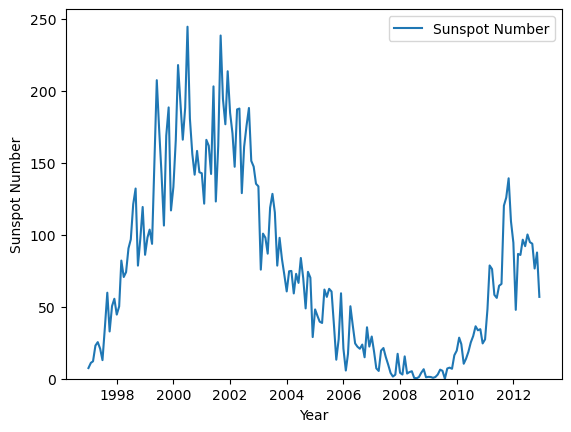

In [31]:
plt.figure()
plt.plot(noaa.index, noaa.quantity('sunspot RI'), label='Sunspot Number')
plt.ylim(bottom=0)
plt.ylabel('Sunspot Number')
plt.xlabel('Year')
plt.legend()

plt.show()

In [36]:
#saves in pickle 
import numpy as np
import pickle
import os
import pandas as pd

df= pd.DataFrame(data={'date':noaa.index, 'num':noaa.quantity('sunspot RI')})
REPO_PATH = os.getcwd()
OPATH = REPO_PATH + '/data'
pfile = OPATH+'/sunspot_num.pickle'
print(pfile)
with open(pfile, 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

/media/sf_onedrive_utn/work/repository/2022_sky_quality_cesco/data/sunspot_num.pickle
